# `get_cpt`: a python utility to fetch `matplotlib` colormaps from `.cpt` files

**The goal:** To provide an easy, unified interface to load external and custom colormaps in `matplotlib`. The focus is on `.cpt` files, which are a common standard in external colormaps [[1]] and are frequently featured in colormap repos such as cpt-city [[2]].

**The background:** Multiple tools to load `.cpt` files already exist (e.g. see here: [[3]],[[4]]). The most encapsulated effort is `pycpt` [[5]], a well-written package that is able to load `.cpt` files from multiple sources. However, this package was originally made for python 2.x and has certain limitations and, sometimes, added complexity for many user groups. 

**The functionality:**
- To create a simple, flexible interface where `.cpt` files can be loaded, building from `pycpt`.
- To utilise the robust engine of `pycpt` for parsing `.cpt` files, after some tweaks and updates. 
- To allow multiple use cases of easy `.cpt` file loads from the user (from full paths, from a preset repo, from a url). 
- To control and simplify the complexity `matplotlib` introduces with its multiple classes of colormaps, but offer added functionality to the user as well, in case he/she wants hex color lists, fewer colors, `ListedColormap` objects instead of `LinearSegmented` ones etc.

**Requirements:**
- python `3.7` or newer
- numpy `1.18.1` or newer
- matplotlib `3.1.3` or newer

Also uses `urllib` for the url handles.


[1]: https://en.wikipedia.org/wiki/CPT_(file_format)
[2]: http://soliton.vm.bytemark.co.uk/pub/cpt-city/
[3]: https://stackoverflow.com/questions/48322741/is-there-a-way-to-save-a-custom-matplotlib-colorbar-to-use-elsewhere
[4]: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Loading_a_colormap_dynamically.html
[5]: https://github.com/j08lue/pycpt/blob/master/pycpt/load.py


# 1. Installation

The simplest way to install the `get_ctp` module is:
a.) Download it from github and place files in a folder `path`
b.) Add this folder to your `PYTHON PATH`, e.g. using `sys.path.append(path)`
c.) Use `import` to load the module. 

<div class="alert alert-block alert-warning">
<b>Note:</b> make sure you have admin rights to the appended path.</div>

<div class="alert alert-block alert-info">
<b>Note:</b> pip installation functionality will be added in a future version.</div>

In [2]:
# example path - change directory accordingly
cptpath = r'D:\Users\bouzidi\Desktop\getcpt-master'

import os, sys
sys.path.append(cptpath)

import get_cpt

# 2. Usage

## 2.1. General usage 

`get_cpt` is a flexible module that allows you to obtain a `LinearSegmented` matplotlib colormap [[1]] from a `cpt path`. The flexibility of the module lies in that the path can be: 
- a full directory path that points to a locally stored `.cpt` file. 
- a `.cpt` file already stored in the local repository which comes preinstalled with the module. This repository is stored in the `basedir` attribute of the module. The local repo features dozens of popular .cpt files from `cpt-city`.
- a url that points to a `.cpt` file from a repo, e.g. a `cpt-city` link.

To do this, use the `get_cmap()` function. The function has extra optional arguments, allowing you to control the `matplotlib` method used and the number of colors returned. In any case, a `matplotlib.colors.LinearSegmentedColormap` object will be returned, ready to be used in `matplotlib` plotting tasks. Use `plot_cmaps()` to view it.


**Note:** The `basedir` attribute can be reset (by resetting it, `get_cpt.basedir = ...`) to find other local repos.

[1]: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html 

D:\Users\bouzidi\Desktop\getcpt-master\cpt
mby


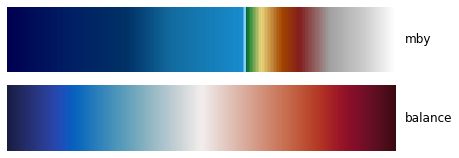

In [15]:
print(get_cpt.basedir) # the local repo
myfile1 = 'mby.cpt'
myfile2 = 'balance.cpt'

# fetch from local repo
cmap1 = get_cpt.get_cmap(myfile1)
cmap2 = get_cpt.get_cmap(myfile2)

# check what we fetched
print(cmap1)
print(cmap1.name)

# plot
import matplotlib.pyplot as plt
fig = get_cpt.plot_cmaps([cmap1, cmap2], cmap_height=1, axes_off=True)
plt.show()

## 2.2. Controlling the number of colors

By employing the method `list` in `get_cmap()`, you can control the granularity of the returned colormap and draft from the actual colors contained in the `.cpt` file. Keep in mind that this is still a (more coarse) `LinearSegmented` colormap interpolation and not a mere list of colors. 

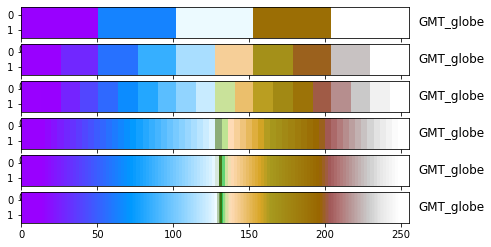

In [20]:
myurl_1 = 'http://soliton.vm.bytemark.co.uk/pub/cpt-city/gmt/GMT_globe.cpt'

mygmt_cmaps = []

for N in [5,10,20,64,128,256]:
    mygmt_cmaps.append(get_cpt.get_cmap(myurl_1, method='list', N=N))
    
print(mygmt_cmaps[2]) # what we fetched

get_cpt.plot_cmaps(mygmt_cmaps)
plt.show()

## 2.3. Getting `ListedColormaps` and lists of colors from `.cpt` files.

There are cases where you might not want a `LinearSegmented` colormap, but a simpler matplotlib construct, the `ListedColormap` [[2]]. Think of it as a list of colors, instead of linearly interpolated colors. Some `matplotlib` graphs actually prefer this over the `LinearSegmented` colormap. `get_cpt` offers this functionality using the `get_listed_cmap()` function. This function actually returns two arguments: 

```
pos, cmap = get_cpt.get_listed_cmap(cptpath)
```

- `cmap` is your `ListedColormap` object. 
- `pos` is a list with the relative (normalised) positions of each color, potentially useful for redefining the colormap limits in your plots.

To get to the list of colors of that particular colormap, simply use the `cmap.colors` attribute. 

[2]: https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.colors.ListedColormap.html

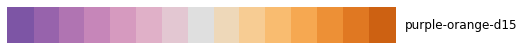

<class 'matplotlib.colors.ListedColormap'>
['#7d55a5', '#9763ac', '#b074b2', '#c686b9', '#d69abf', '#e0b0c8', '#e3c7d2', '#dfdfdf', '#eed8b9', '#f7cc93', '#f9bc70', '#f6a851', '#ed9036', '#e07822', '#cd6112']
[0.0, 0.07142857142857142, 0.14285714285714285, 0.21428571428571427, 0.2857142857142857, 0.35714285714285715, 0.42857142857142855, 0.5, 0.5714285714285714, 0.6428571428571429, 0.7142857142857143, 0.7857142857142857, 0.8571428571428571, 0.9285714285714286, 1.0]
Colors fetched:  15
Color positions:  15


In [31]:
myurl_2 = 'http://soliton.vm.bytemark.co.uk/pub/cpt-city/km/purple-orange-d15.cpt'

pos, cmap_po = get_cpt.get_listed_cmap(myurl_2)

get_cpt.plot_cmaps(cmap_po, axes_off=True)
plt.show()

print(type(cmap_po))
po_colors = cmap_po.colors # get the hex colors of the palette
print(po_colors) # hex colors
print(pos) # normalised positions of colors
print("Colors fetched: ", len(po_colors))
print("Color positions: ", len(pos))

### Getting a subset of the colormap colors for `ListedColormap` objects.

You can also control the colors fetched in that case, and get only a subset of the colors included in the file. Just employ the `N` parameter of the `get_listed_cmap()` function to a number smaller than the colors contained in the `.cpt` file. 

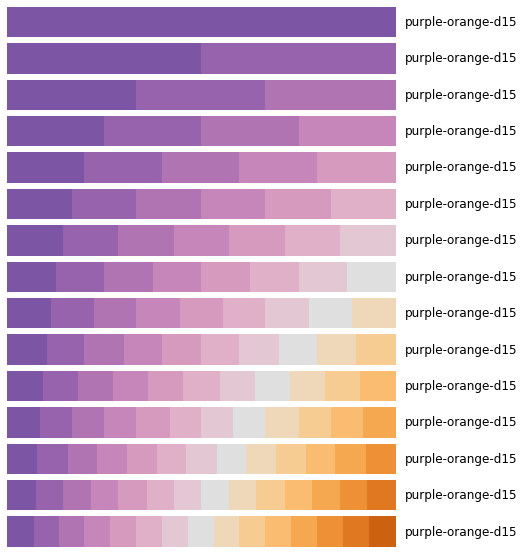

In [35]:
mypo_cmaps = []

Nmax = len(pos)

for N in range(1,Nmax+1):
    _, cmap = get_cpt.get_listed_cmap(myurl_2, N=N)
    mypo_cmaps.append(cmap)
    
get_cpt.plot_cmaps(mypo_cmaps, axes_off=True)
plt.show()

## 2.4. Using the output

The output can be used whenever a `matplotlib.colors.colormap` object of the same type would be expected. Experiment with your fetches and enjoy!

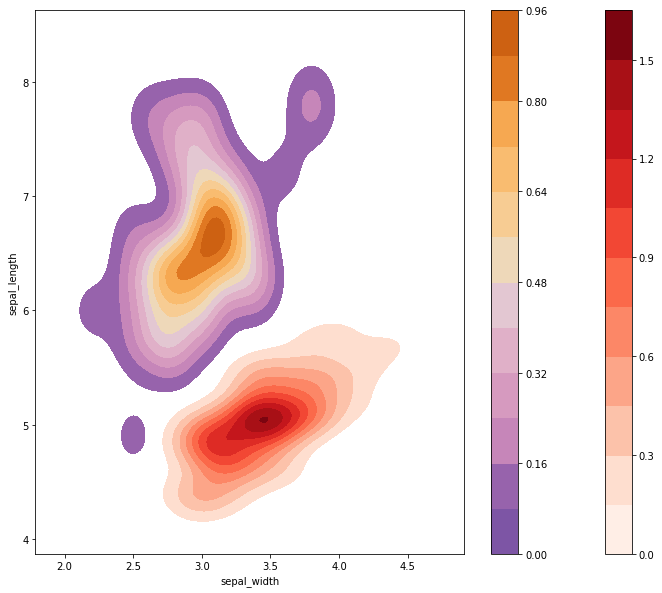

In [42]:
# example
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.figure(figsize=(12,10))

iris = sns.load_dataset("iris")
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]
# a standard matplotlib colormap
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap='Reds', n_levels=12, shade=True, shade_lowest=False, cbar=True)
# the one we fetched
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap=cmap_po, n_levels=12, shade=True, shade_lowest=False, cbar=True)

plt.show()

# 3. Epilogue

Thanks go to:
- the creator of the original `pycpt` package (https://github.com/j08lue/pycpt). 
- `dnikolop` (https://github.com/dionikolop) for his tests.

Future versions of this package will:
1. Adress unavoidable issues and bugs, as well as edge cases. 
2. Potentially offer functionality to load other colormap file templates (ideas welcome).
3. Increase the QoL of that package, e.g. with functions to see the info contained in `.cpt` files etc. 
4. Align with changes and development in `pycpt` as well. 

Every modification or enhancement/redevelopment of the code is welcome.